## THE SPARKS FOUNDATION #GRIPFEB2021
### NAME: Veena Badgujar

#### TASK 6:Create the Decision Tree classifier and visualize it graphically.

In [1]:
#Import require Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Iris.csv') 
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.shape # Check Shape of the Data

(150, 6)

In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info() # Information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum() # Check Is there any Null Values


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# Declare Feature Vector and Target variables
X = df.drop(['Species', 'Id'], axis = 1) # Drop Two, Columnw which is not required for Feature Vectors
Y = df['Species']

In [7]:
# Split the Data
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size = .30, random_state = 42)

In [8]:
# Check the unique Values
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Decision Tree Classifier with Gini Index

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Initialize the Decision Tree model
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0) 


# fit the model
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [10]:
# Predict the values with Gini Index
Y_pred_gini = clf_gini.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_gini)))

Model accuracy score with criterion gini index: 1.0000


In [11]:
y_pred_train_gini = clf_gini.predict(X_train)
# Check the Accuracy
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train_gini)))


Training-set accuracy score: 0.9524


In [12]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, Y_train)))
# CHeck the train and test Accuracy
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, Y_test)))

Training set score: 0.9524
Test set score: 1.0000


[Text(209.25, 475.65000000000003, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(139.5, 339.75, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(279.0, 339.75, 'X[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(139.5, 203.85000000000002, 'X[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(69.75, 67.94999999999999, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(209.25, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(418.5, 203.85000000000002, 'X[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(348.75, 67.94999999999999, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(488.25, 67.94999999999999, 'gini = 0.059\nsamples = 33\nvalue = [0, 1, 32]')]

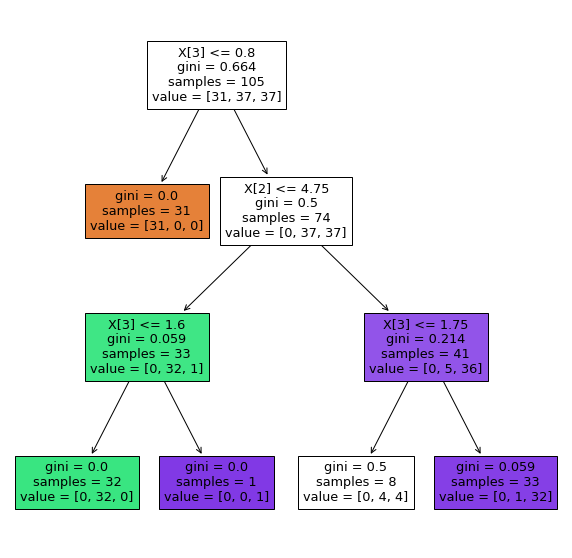

In [13]:
# VIsualize the tree, Graphically
from sklearn import tree
plt.figure(figsize = (10,10))
tree.plot_tree(clf_gini.fit(X_train, Y_train),filled=True)

In [14]:
Decision Tree Classifier with criterion entropy

SyntaxError: invalid syntax (<ipython-input-14-f5d43c8d3ca3>, line 1)

In [15]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, Y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [16]:
Y_pred_en = clf_en.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_en)))

Model accuracy score with criterion entropy: 0.9778


In [17]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, Y_test)))


Training set score: 0.9524
Test set score: 0.9778


[Text(209.25, 475.65000000000003, 'X[3] <= 0.8\nentropy = 1.58\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(139.5, 339.75, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(279.0, 339.75, 'X[2] <= 4.75\nentropy = 1.0\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(139.5, 203.85000000000002, 'X[3] <= 1.6\nentropy = 0.196\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(69.75, 67.94999999999999, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(209.25, 67.94999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(418.5, 203.85000000000002, 'X[2] <= 5.15\nentropy = 0.535\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(348.75, 67.94999999999999, 'entropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]'),
 Text(488.25, 67.94999999999999, 'entropy = 0.0\nsamples = 26\nvalue = [0, 0, 26]')]

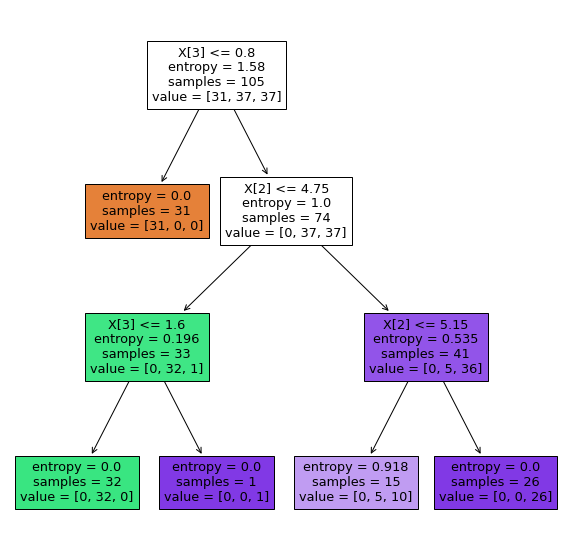

In [18]:
#Plot the Tree
plt.figure(figsize = (10,10))
tree.plot_tree(clf_en.fit(X_train, Y_train),filled=True)

In [19]:
#Confusion Matrix and Classification
from sklearn.metrics import confusion_matrix, classification_report
Con_Mat = confusion_matrix(Y_test, Y_pred_en)
print('Confusion Matix:{} \n\n\n Classification Report: {}'.format(Con_Mat, classification_report(Y_test, Y_pred_en)))

Confusion Matix:[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]] 


 Classification Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



### Result and Conclusion
#### 1- In this project, I tried to build a Decision-Tree Classifier model to predict the Species of the Iris dataset with two criterions ie one with criterion gini index and another one with criterion entropy. The model yields a very good performance as indicated by the model accuracy in both the cases.

#### 2- In the model with criterion gini index, the training-set accuracy score is 0.9524 while the test-set accuracy to be 0.9778. These two values are quite comparable. So, there is no sign of overfitting.

#### In both the cases, the training-set and test-set accuracy score is the same. It may happen because of small dataset. The confusion matrix and classification report yields very good model performance.